In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes = True)

**Importing the dataset**

In [2]:
zomato = pd.read_csv("D:\\Data Science\\INeuron Internship\\zomato.csv")
zomato.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
zomato.shape

(51717, 17)

**Data manipulation and EDA**

In [4]:
zomato.info()                   #No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
zomato.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


Avg votes = 283

In [6]:
#Removing in case there is any duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)
zomato.shape

(51717, 17)

In [7]:
#Removing the unnecessary columns
Zomato = zomato.drop(['url','address','phone','dish_liked','reviews_list','menu_item'],axis=1)

In [8]:
Zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [9]:
pd.DataFrame(Zomato.isnull().sum(), columns= ['Missing values'])

,Missing values
name,0
online_order,0
book_table,0
rate,7775
votes,0
location,21
rest_type,227
cuisines,45
approx_cost(for two people),346
listed_in(type),0


*A lot of missing values in keys 'rate', 'location', 'rest_type', 'cuisines' and 'approx_cost(for two people)' needs to be taken care of one by one*

*Rectifying the values for Zomato[rate]*

In [10]:
Zomato['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

A unique value i.e. '-' is present which need to be rectified

In [11]:
Zomato['rate'].value_counts()

NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 64, dtype: int64

A value i.e. 'NEW' needs to be rectified

In [12]:
#Clearing the dataset of irrelevant vlues like 'NEW' and '-'
Zomato = Zomato.loc[Zomato.rate != 'NEW']
Zomato = Zomato.loc[Zomato.rate != '-']
Zomato['rate'].value_counts()

3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
3.8 /5    1851
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: rate, Length: 62, dtype: int64

In [13]:
Zomato.shape

(49440, 11)

In [14]:
#Removing '/5' from all the values
abc = lambda x: x.replace('/5', '') if type(x) == np.str else x
Zomato.rate = Zomato.rate.apply(abc).str.strip().astype('float')
Zomato.head()

<ipython-input-14-dec3f77391bc>:2: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  abc = lambda x: x.replace('/5', '') if type(x) == np.str else x


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [15]:
#Filling the null values with median
Zomato['rate'] = Zomato['rate'].fillna(Zomato['rate'].median())

In [16]:
pd.DataFrame(Zomato.isnull().sum(), columns= ['Missing values'])

,Missing values
name,0
online_order,0
book_table,0
rate,0
votes,0
location,21
rest_type,225
cuisines,45
approx_cost(for two people),341
listed_in(type),0


*Rectifying the values for Zomato[location]*

In [17]:
Zomato['location'] = Zomato['location'].fillna(Zomato['location'].mode().iloc[0])

In [18]:
pd.DataFrame(Zomato.isnull().sum(), columns= ['Missing values'])

,Missing values
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,225
cuisines,45
approx_cost(for two people),341
listed_in(type),0


*Rectifying the values for Zomato[rest_type]*

In [19]:
Zomato['rest_type'] = Zomato['rest_type'].fillna(Zomato['rest_type'].mode().iloc[0])

In [20]:
pd.DataFrame(Zomato.isnull().sum(), columns= ['Missing values'])

,Missing values
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,0
cuisines,45
approx_cost(for two people),341
listed_in(type),0


*Rectifying the values for Zomato[cuisines]*

In [21]:
Zomato['cuisines'] = Zomato['cuisines'].fillna(Zomato['cuisines'].mode().iloc[0])

In [22]:
pd.DataFrame(Zomato.isnull().sum(), columns= ['Missing values'])

,Missing values
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,0
cuisines,0
approx_cost(for two people),341
listed_in(type),0


*Rectifying the values for Zomato[approx_cost(for two people)]*

In [23]:
Zomato['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '80', '50', '190', '1,700', nan, '180', '1,350', '2,200',
       '1,400', '2,000', '1,800', '1,900', '330', '2,500', '2,100',
       '3,000', '2,800', '3,400', '40', '1,250', '3,500', '4,000',
       '2,400', '2,600', '120', '1,450', '469', '70', '3,200', '60',
       '240', '6,000', '1,050', '2,300', '4,100', '5,000', '3,700',
       '1,650', '2,700', '4,500', '140', '360'], dtype=object)

In [24]:
#replacing the value anomalies
Zomato['approx_cost(for two people)'] = Zomato['approx_cost(for two people)'].astype(str)
Zomato['approx_cost(for two people)'] = Zomato['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))
Zomato['approx_cost(for two people)'] = Zomato['approx_cost(for two people)'].astype(float)
Zomato['approx_cost(for two people)'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199., 1100., 1600.,  230.,  130.,
         80.,   50.,  190., 1700.,   nan,  180., 1350., 2200., 1400.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  240., 6000., 1050., 2300., 4100., 5000.,
       3700., 1650., 2700., 4500.,  140.,  360.])

In [25]:
#filling the null values
Zomato['approx_cost(for two people)'] = Zomato['approx_cost(for two people)'].fillna(Zomato['approx_cost(for two people)'].mean())

In [26]:
pd.DataFrame(Zomato.isnull().sum(), columns= ['Missing values'])

,Missing values
name,0
online_order,0
book_table,0
rate,0
votes,0
location,0
rest_type,0
cuisines,0
approx_cost(for two people),0
listed_in(type),0


*The dataset is now cleaned and structured. It is now ready for visualisatons*

In [27]:
Zomato.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


**Saving the cleaned data**

In [28]:
Zomato.to_csv('Zomato_cleaned_data.csv')

**Visualisations**

Most and least popular areas

<AxesSubplot:>

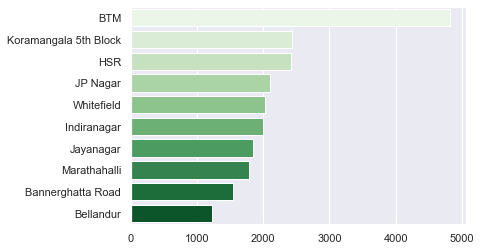

In [29]:
most = Zomato.location.value_counts().nlargest(10)
sns.barplot(x = most.values, y = most.index, palette = 'Greens')

<AxesSubplot:>

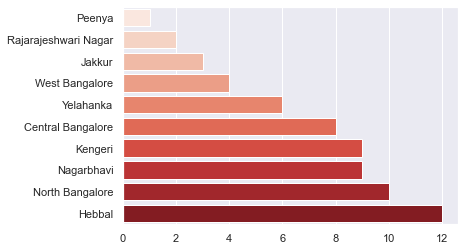

In [30]:
least = Zomato.location.value_counts().nsmallest(10)
sns.barplot(x = least.values, y = least.index, palette = 'Reds')

BTM has the highest number of diners/cafes and is very popular

whereas Peenya is underrated having the lowest count of restaurants

*Hence, measures need to be taken in areas having lesser diners like faster delivery from distant areas*

*Cafes/Diners having highest number of branches*

<AxesSubplot:>

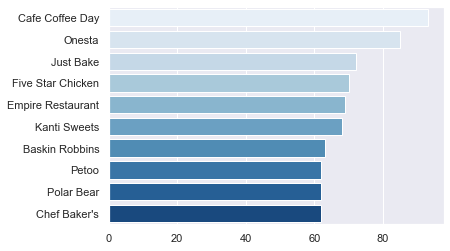

In [31]:
Branch = Zomato.name.value_counts().nlargest(10)
sns.barplot(x = Branch.values, y = Branch.index, palette = 'Blues')

CCD has the highest branches

*Online Order Option*

<AxesSubplot:>

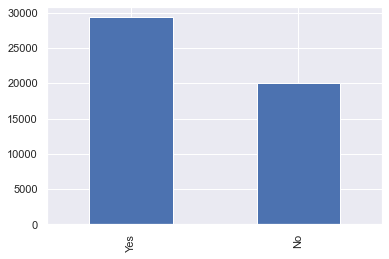

In [32]:
Zomato.online_order.value_counts().plot(kind='bar')

Most cafes have online order & delivery option but still about 20000 of them doesn't have this option.

*Pre-booking option*

<AxesSubplot:>

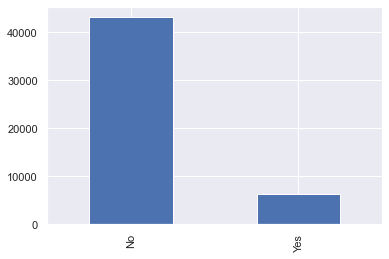

In [33]:
Zomato.book_table.value_counts().plot(kind='bar')

Most cafes/diners doesn't require pre-booking

<AxesSubplot:xlabel='rate', ylabel='approx_cost(for two people)'>

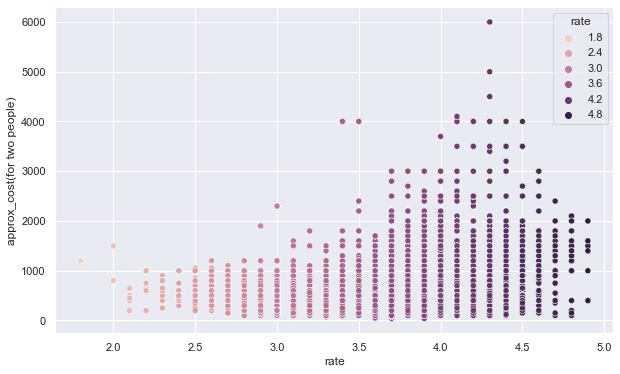

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = Zomato, x='rate',y='approx_cost(for two people)', hue='rate')

From the above co-relation, good ratings are received irrespective of the price of dishes.

**Model Building**

In [35]:
#Encoding the text data
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [36]:
Zomato['online_order'] = LE.fit_transform(Zomato['online_order'])
Zomato['book_table'] = LE.fit_transform(Zomato['book_table'])
Zomato['location'] = LE.fit_transform(Zomato['location'])
Zomato['rest_type'] = LE.fit_transform(Zomato['rest_type'])
Zomato['cuisines'] = LE.fit_transform(Zomato['cuisines'])
Zomato['listed_in(type)'] = LE.fit_transform(Zomato['listed_in(type)'])
Zomato['listed_in(city)'] = LE.fit_transform(Zomato['listed_in(city)'])

In [37]:
#Splitting data for train and test
X = Zomato.drop(columns= ['name', 'rate', 'listed_in(city)'], axis = 1)
Y = Zomato['rate']

In [38]:
print( X)

       online_order  book_table  votes  location  rest_type  cuisines  \
0                 1           1    775         1         27      2091   
1                 1           0    787         1         27       922   
2                 1           0    918         1         22       743   
3                 0           0     88         1         78      2469   
4                 0           0    166         4         27      2119   
...             ...         ...    ...       ...        ...       ...   
51712             0           0     27        89          8       977   
51713             0           0      0        89          8      1346   
51714             0           0      0        89          8      1346   
51715             0           1    236        26          8      1346   
51716             0           0     13        26         10      1371   

       approx_cost(for two people)  listed_in(type)  
0                            800.0                0  
1              

In [39]:
print(Y)

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    3.7
51714    3.7
51715    4.3
51716    3.4
Name: rate, Length: 49440, dtype: float64


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, stratify=Y, random_state=2)

**Training the model using Logistic Regression and making predictions with test samples**

In [41]:
from sklearn.linear_model import LinearRegression
LinR = LinearRegression()

In [42]:
LinR.fit(X_train,Y_train)

LinearRegression()

In [43]:
prediction1 = LinR.predict(X_test)
print(prediction1)

[3.64379897 3.60628615 3.63234927 ... 3.64712771 3.69990251 3.58768952]


In [44]:
#checking the accuracy score
from sklearn.metrics import r2_score
r2_score(Y_test,prediction1)

0.2736189692917306

**Training the model using XGB Regressor and making predictions with test samples**

In [58]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(boost='gblinear',n_estimators=100, learning_rate=0.3, max_depth=10)
xgbr.fit(X_train, Y_train)

[15:16:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "boost" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, boost='gblinear', booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [59]:
prediction2 = xgbr.predict(X_test)
print(prediction2)

[4.2139254 3.4918592 3.7085307 ... 3.8635926 3.2641463 3.1184115]


In [60]:
#checking the accuracy score
r2_score(Y_test,prediction2)

0.890018600318087

**Training the model using Random Forest Regressor and making predictions with test samples**

In [110]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=100, random_state=80, min_samples_split=2, min_samples_leaf=0.001)
RFR.fit(X_train, Y_train)

RandomForestRegressor(min_samples_leaf=0.001, random_state=80)

In [111]:
prediction3 = RFR.predict(X_test)
print(prediction3)

[4.11343608 3.5093317  3.7        ... 3.80058971 3.69916268 3.34277164]


In [112]:
#checking the accuracy score
r2_score(Y_test,prediction3)

0.6167456495195472

**Out of the three models XGBRegressor has the highest accurate rate and is therefore the best model**

*testing a new restaurant for it's prediction*

In [78]:
X.head()

,online_order,book_table,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,1,1,775,1,27,2091,800.0,0
1,1,0,787,1,27,922,800.0,0
2,1,0,918,1,22,743,800.0,0
3,0,0,88,1,78,2469,300.0,0
4,0,0,166,4,27,2119,600.0,0


In [99]:
xyz = [1,0,850,1,27,2119,700,0]
new_data = pd.DataFrame(xyz)
new_data = new_data.T
dd = new_data.columns = ["online_order","book_table","votes","location","rest_type","cuisines","cost_2_people","type"]
new_data

,online_order,book_table,votes,location,rest_type,cuisines,cost_2_people,type
0,1,0,850,1,27,2119,700,0


In [114]:
 new_pred = xgbr.predict(new_data)
print("The predictions are: ", new_pred)

The predictions are:  [4.0408154]
